In [1]:
# K-means Algorithm

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import random as rd

In [12]:
#reading the file

dataFrame = pd.read_csv("test_data.csv")
dataFrame = dataFrame[['BMI', 'Glucose']]
#data values in pandas array form
data = dataFrame.values
np.mean(data[3])

49.183760684999996

In [13]:
no_of_features = data.shape[1]
no_of_points = data.shape[0]



#normalise data for each column with mean 0 and std deviation 1
for i in range(no_of_features):
    std_deviation = np.std(data[:, i]) #calculates std devation for each feature
    data[:,i] -= np.mean(data[:, i])   #subtract mean from each column
    data[:, i] /= std_deviation



In [14]:
#checking if the normalisation occurs succesfully

for i in range(no_of_features):
    print("Mean" + str(np.mean(data[:,i])))
    print("std dev" + str(np.std(data[:,i])))

#it does

Mean-5.997357782808092e-16
std dev0.9999999999999999
Mean1.9907447338106256e-16
std dev1.0


9

In [51]:
data[0, :1]

array([-0.81667527])

IndexError: arrays used as indices must be of integer (or boolean) type

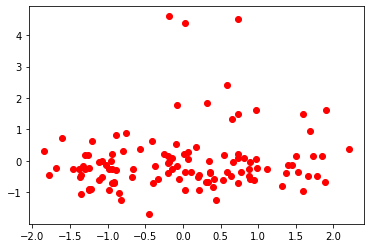

In [15]:
for data_point in data:
    plt.plot(data_point[0], data_point[1], 'ro')


In [97]:
#initialising the means/centers i.e. starting points

#let's say we have k = 3, i.e. three cluster
#choosing three indices randomly to select three initial means
k = 3
mean_indices = [0]*k
for i in range(k):
    mean_indices[i] = rd.randint(0, no_of_points)
    
    
means = [None]*k
for i in range(k):
    means[i] = data[mean_indices[i], ]

In [140]:
#let's manually color code the centroids
colors = ['red', 'blue', 'green']
#so now if the data_points is closest to the ith centroid, we give it the ith color

# #we also need a list corresponding to each point which will store the color code for that particular pt.
# data_point_color = [None]*no_of_points
# index_for_coloring_data_point = 0

#we are not using color coding because we later need to find averages as well. So, instead we will just create
#clusters 
#initialise clusters 
clusters = []
for i in range(k):
    clusters.append([])

for data_point in data:
    
    
    distance = [None]*k
    for i in range(k):
        distance[i] = np.linalg.norm(data_point - means[i])
    
    distance_index = distance.index(min(distance))
    
#     #now store the corresponding color in the data_point_color list
#     data_point_color[index_for_coloring_data_point] = colors[distance_index]
#     index_for_coloring_data_point += 1
    clusters[distance_index].append(data_point)
    

#now we need to find new clusters   
new_centroids = []
for i in range(k):
    new_centroids.append([np.average(clusters[i], axis = 0)])
    
    

#therefore we now have the new centroids and we need to check for tolerance level

    
    
    
    

In [192]:

#we define tolerance to figure out if the centroids have moved enough or not, if not we keep the iteration going.
tolerance = 0.001

isOptimised = True
prev_centroid_index = 0
for centroid in new_centroids:
    prev_centroid = means[prev_centroid_index]
    print(type(centroid))
    print(type(prev_centroid))
    if np.sum((centroid - prev_centroid) / prev_centroid * 100) > tolerance:
                    isOptimised = False
isOptimised

#now if isOptimised if False, then we need to run the loop again, but now replace the prev_centroids values with
#the current centroid value.
#our next job is to to write all of the algorithm in a while loop.
#if isOptimised or no of iterations = say 10 we get out of the loop.

<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


False

TypeError: list indices must be integers or slices, not list

array([[ 1,  2,  5],
       [ 3,  4, 10]])

In [216]:
np.average(test, axis = 0)

array([2. , 3. , 7.5])

In [16]:
#let's bring all the pieces together


def kmeans(data, k):
    
    tolerance = 0.001
    
    #randomly initialising centroids
    centroids_indices = [0]*k
    for i in range(k):
        centroids_indices[i] = rd.randint(0, no_of_points)
    centroids = [None]*k
    for i in range(k):
        centroids[i] = data[centroids_indices[i], ]
    
    no_of_iterations = 5
    current_iteration = 0
    isOptimised = False
    
    while (not(isOptimised) or no_of_iterations < 5):
        
        #initialise clusters 
        clusters = []
        for i in range(k):
            clusters.append([])
        
        for data_point in data:
            distance = [None]*k

            for i in range(k):
                distance[i] = np.linalg.norm(data_point - centroids[i])

            distance_index = distance.index(min(distance))

            #     now store the corresponding color in the data_point_color list
            #     data_point_color[index_for_coloring_data_point] = colors[distance_index]
            #     index_for_coloring_data_point += 1

            clusters[distance_index].append(data_point)


        #now we need to find new clusters   
        new_centroids = []
        for i in range(k):
            new_centroids.append([np.average(clusters[i], axis = 0)])




        isOptimised = True

        prev_centroid_index = 0

        for centroid in new_centroids:
            prev_centroid = centroids[prev_centroid_index]
            
            if np.sum((centroid - prev_centroid) / prev_centroid * 100) > tolerance:
                    isOptimised = False
            prev_centroid_index += 1

        
        
        if isOptimised:
            break
        if (not(isOptimised)):
            centroids = np.array(new_centroids)
            print("We had to start again "+ str(current_iteration))
            
            
        current_iteration += 1
    
    return (centroids, clusters)
    
        
    

    
    
    

In [21]:
centroids, clusters = kmeans(data, 3)

We had to start again 0
We had to start again 1
We had to start again 2
We had to start again 3
We had to start again 4


In [23]:
clusters

[[array([ 0.89164604, -0.57041123]),
  array([ 1.38995316, -0.12453722]),
  array([ 1.78665904, -0.48123643]),
  array([ 0.19897467, -0.52582383]),
  array([ 0.87885318, -0.48123643]),
  array([ 0.9380261 , -0.61499863]),
  array([ 0.53910824, -0.61499863]),
  array([ 0.58038932, -0.34747423]),
  array([ 1.89128561, -0.65958603]),
  array([2.20001136, 0.36592419]),
  array([ 0.77312562, -0.34747423]),
  array([ 1.53420553, -0.34747423]),
  array([ 1.3189646 , -0.79334824]),
  array([1.7265687 , 0.14298718]),
  array([1.842182  , 0.14298718]),
  array([ 1.65525376, -0.48123643]),
  array([ 1.36843666, -0.39206163]),
  array([ 0.02134007, -0.92711044]),
  array([ 0.40505682, -0.83793564]),
  array([ 0.73152251, -0.70417344]),
  array([1.50258382, 0.14298718]),
  array([ 1.60166006, -0.97169784]),
  array([ 0.32736081, -0.65958603]),
  array([-0.05643966, -0.57041123]),
  array([ 0.98388276, -0.21371203]),
  array([0.54374635, 0.18757458]),
  array([ 0.02358514, -0.34747423]),
  array([ 0

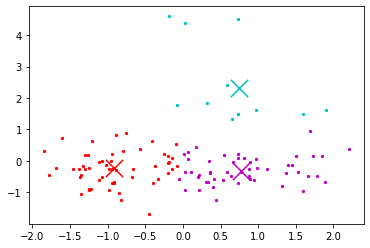

In [50]:
colors = 10 * ["m", "c", "r", "g", "b", "k"]


#plotting the centroids

    
#plotting the clusters
color_index_centroid = 0
for data_point in centroids:
    plt.scatter(data_point[:, 0], data_point[:, 1], marker = 'x', s = 300, color = colors[color_index_centroid])
    color_index_centroid +=1
    
    
color_index = 0
for cluster in clusters:
    color = colors[color_index]
    for data_point in cluster:
        plt.scatter(data_point[0], data_point[1], color = color, s = 5)
    color_index += 1
        

61